In [4]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from matplotlib import reload
import xarray as xr
from xarray import Dataset as ds
import sys
sys.path.append('..')
import map_fxn as mf
import cluster_fxn as cf
%matplotlib inline
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:])

import scipy.io as sio

In [5]:
reload(mf)
reload(cf)

<module 'cluster_fxn' from '/ocean/tjarniko/MEOPAR/at3/CLUSTER/verze2pt0/hind_clfxn/maps_signals/cluster_fxn.py'>

###### WIND - 2016

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jul 19 15:16:29 2017', '__version__': '1.0', '__globals__': [], 'cl_n': array([[7]], dtype=uint8), 'clustermap': array([[5],
       [5],
       [2],
       [7],
       [2],
       [5],
       [5],
       [5],
       [1],
       [5],
       [5],
       [5],
       [5],
       [2],
       [2],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [1],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [2],
       [1],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [1],
       [5],
       [5],
       [5],
       [5],

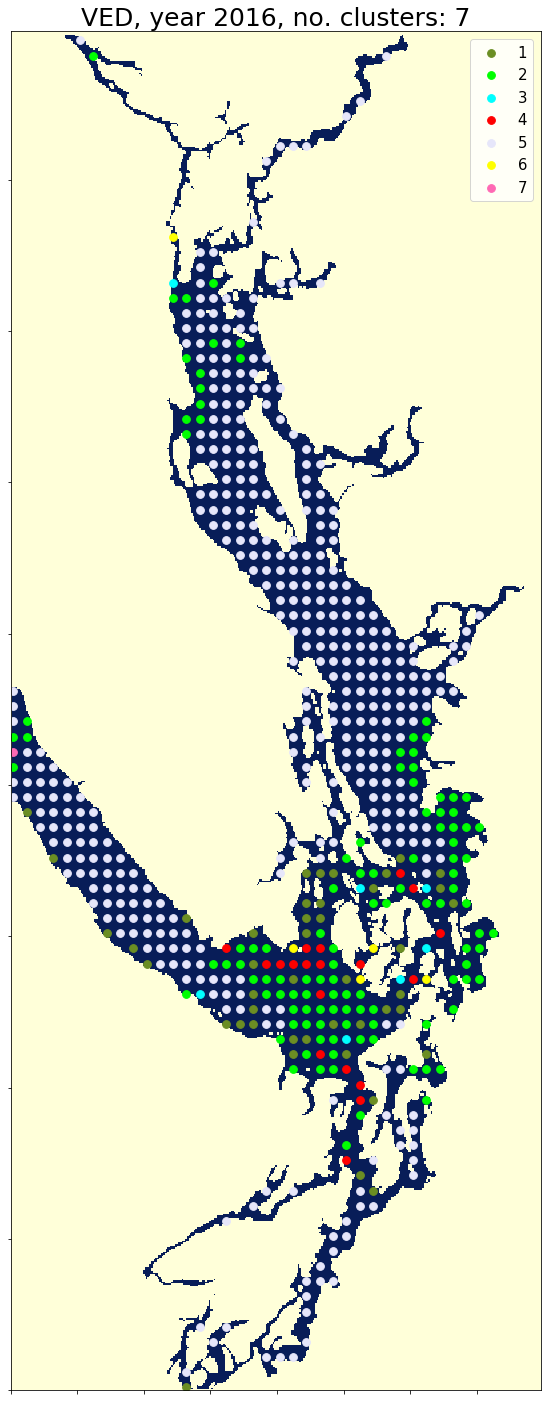

In [9]:
var = 'ved'
year = '2016'
fs = var + '_' + year + 'hind_cl.mat'

mat_contents = sio.loadmat(fs)
print(mat_contents)
cl = np.squeeze((mat_contents['clustermap']))
no_clusters = max(cl)
print(no_clusters)
tit = var +', year ' + year +', no. clusters: ' +str(no_clusters)

markersize = 60
titfontsize = 25
legfontsize = 15
fsx = 20
fsy = 25
fname = './figs/' + var + year + 'map.jpg'

cf.map_clusters(tit,no_clusters,cl,fsx,fsy,markersize,titfontsize,legfontsize,fname)



10.8759728266
0.0884436489387


/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


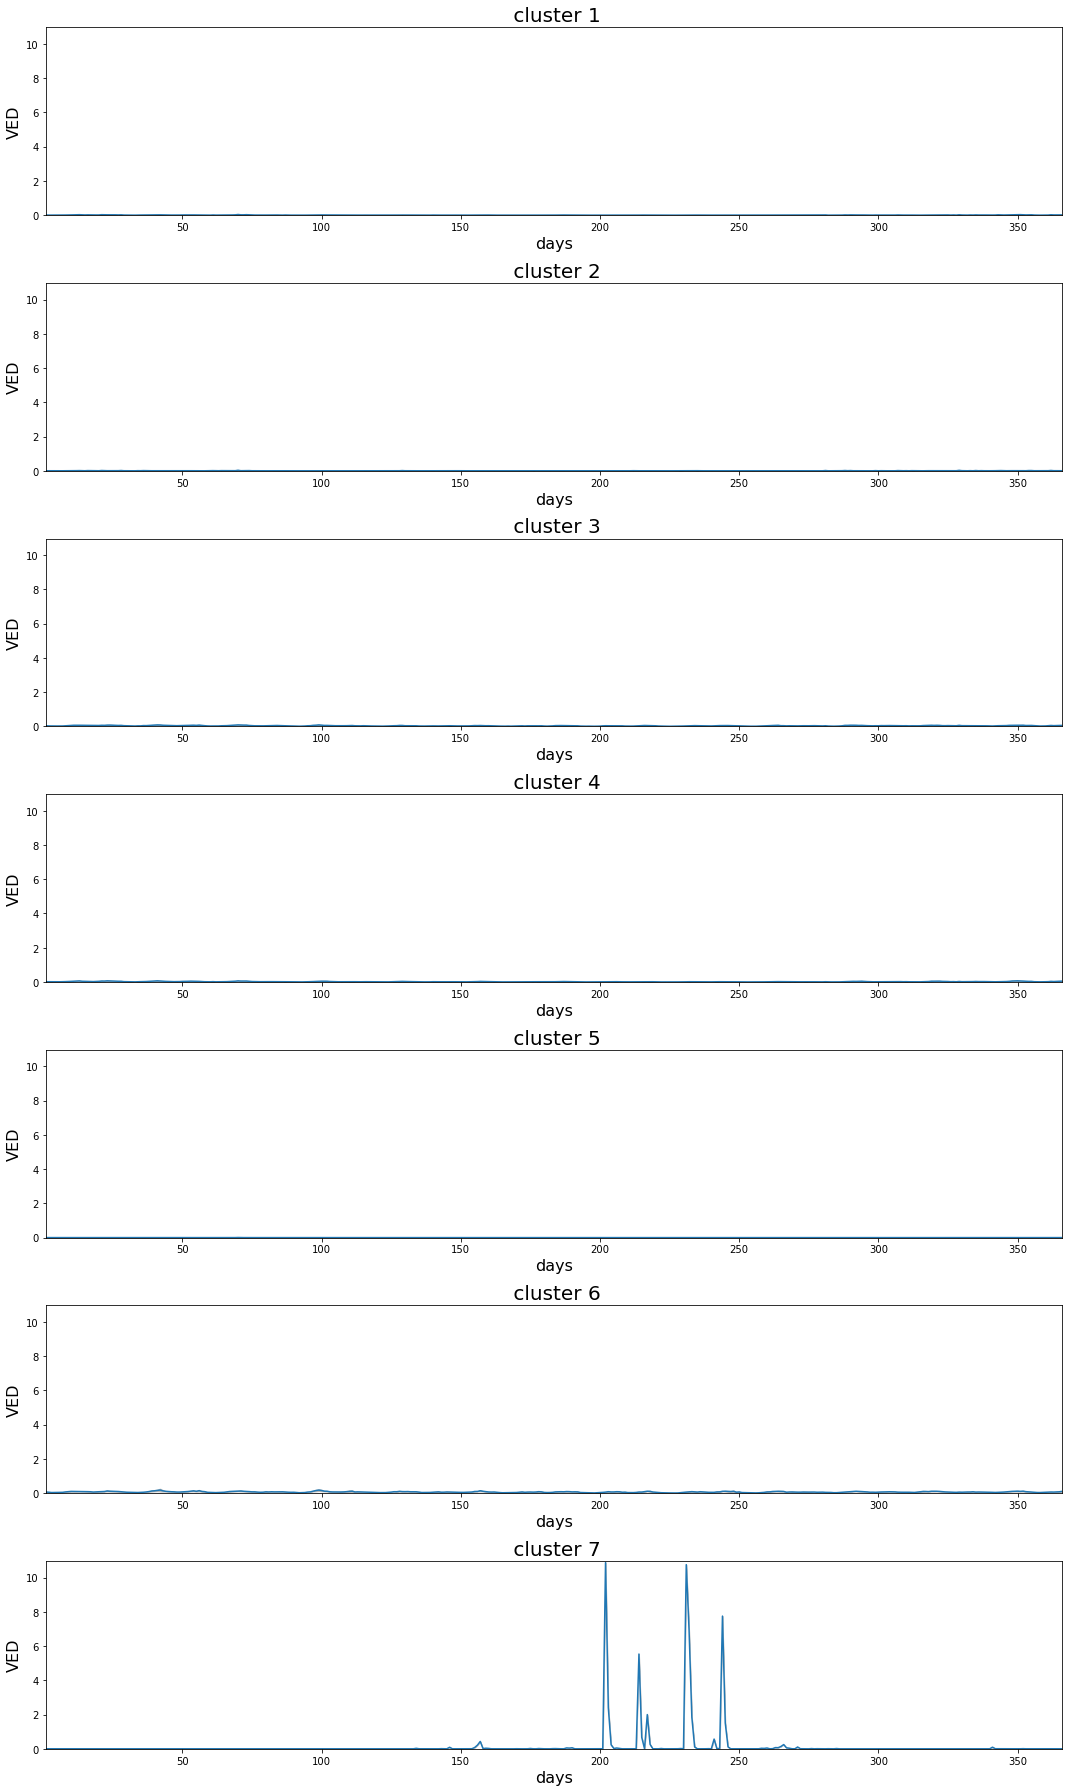

In [34]:
sm = np.squeeze((mat_contents['datamat']))
days = 366
mp, stp = cf.find_mean_patterns(sm,no_clusters,cl,days)
ymax = np.max(mp)
smax = np.max(stp)
print(ymax)
print(smax)
ymax = ymax + smax

fname2  =  './figs/' + var + year + 'signals.jpg'
cf.plot_signals(no_clusters,mp,stp,0,ymax,'VED',15,25,days,fname2)

## Surface Nitrate


## Biology